# Lab 9


Data importation:

In [201]:
from sklearn.datasets import fetch_openml
import numpy as np



mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]

Centering data

In [202]:
sample = X[:2000]

means = np.mean(sample, 0)
means = np.tile(means, (2000,1))

sample = sample - means

    
print(np.shape(means))
print(np.shape(sample))

(2000, 784)
(2000, 784)


Calculating covariance

In [203]:
cov = np.matmul(np.transpose(sample), sample)
cov /= 2000
print(np.shape(cov))

(784, 784)


Calculating eigenvalues and eigenvectors

In [204]:
lam, u = np.linalg.eig(cov)

u = np.transpose(u)

eigsum = np.sum(lam)

maxlam = np.array(lam[lam.argmax()])
maxu = np.array(u[lam.argmax()])
u = np.delete(u, lam.argmax(), 0)
lam = np.delete(lam, lam.argmax(), 0)

for i in range(2):
    maxlam = np.append(maxlam, lam[lam.argmax()])
    maxu = np.append(maxu, u[lam.argmax()])
    u = np.delete(u, lam.argmax(), 0)
    lam = np.delete(lam, lam.argmax(), 0)
    
    
    
    
print("Eigenvalues (using first two in d=2, all three in d=3)")
print(maxlam[0])
print(maxlam[1])
print(maxlam[2])

print("\nVariance for 2 PCA components:")
print(np.sum(maxlam, where = [True, True, False]) / eigsum)
print("\nVariance for 3 PCA components:")
print(np.sum(maxlam, where = [True, True, True]) / eigsum)

Eigenvalues (using first two in d=2, all three in d=3)
(338999.0506439715+0j)
(252673.2210849556+0j)
(218909.6206779813+0j)

Variance for 2 PCA components:
(0.17470154993273213-2.6043101690713752e-36j)

Variance for 3 PCA components:
(0.2393384306097281-3.5678647895596876e-36j)


Projecting sample

In [205]:
coor1 = np.matmul(sample, u[0])
coor2 = np.matmul(sample, u[1])
coor3 = np.matmul(sample, u[2])

print(np.shape(coor1))
print(np.shape(coor2))
print(np.shape(coor3))

(2000,)
(2000,)
(2000,)


Plotting results

d = 2:

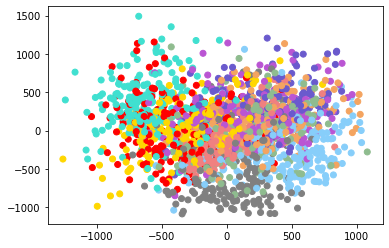

In [206]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y = mnist["target"][:2000]
keys = {
    '0': 'gray',
    '1': 'lightcoral',
    '2': 'red',
    '3': 'sandybrown',
    '4': 'gold',
    '5': 'darkseagreen',
    '6': 'turquoise',
    '7': 'lightskyblue',
    '8': 'slateblue',
    '9': 'mediumorchid'
}

corrs = []

for i in Y:
    corrs.append(keys[i])

sc = plt.scatter(coor1, coor2, c = corrs)


d = 3:

In [195]:
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(coor1, coor2, coor3, c = corrs)
plt.show()

ValueError: Invalid RGBA argument: masked_array(data=[0.56078431+0.j, 0.7372549 +0.j, 0.56078431+0.j,
                   0.80023169+0.j],
             mask=False,
       fill_value=(1e+20+0j))

<Figure size 432x288 with 1 Axes>